# TM10007 Assignment template

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [43]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# fetch data
from worclipo.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')
print(type(data))


The number of samples: 115
The number of columns: 494
<class 'pandas.core.frame.DataFrame'>


# setting up the data to be processed

In [44]:
# the possible outcomes: lipoma or liposarcoma
labels = list(set(data.label))

# remove columns only containing 0
data = data.loc[:, (data != 0.0).any(axis=0)] 
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

# change lipoma and liposarcoma to 0 and 1
data.loc[data['label'] == 'lipoma', 'label'] = 0
data.loc[data['label'] == 'liposarcoma', 'label'] = 1

# export to csv to see if the code works as expected
data.to_csv('datacheck.csv', index=False)

The number of samples: 115
The number of columns: 481


# Functions to generate plots (from excercises)-- example to fetch data

In [45]:
from sklearn.decomposition import PCA

def colorplot(clf, ax, x, y, h=100, precomputer=None):
    '''
    Overlay the decision areas as colors in an axes.
    
    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    features = np.c_[xx.ravel(), yy.ravel()]
    if precomputer is not None:
        if type(precomputer) is RBFSampler:
            features = precomputer.transform(features)
        elif precomputer is rbf_kernel:
            features = rbf_kernel(features, X)
            
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(features)
    else:
        Z = clf.predict_proba(features)
    if len(Z.shape) > 1:
        Z = Z[:, 1]
    
    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm

# Plot -- example

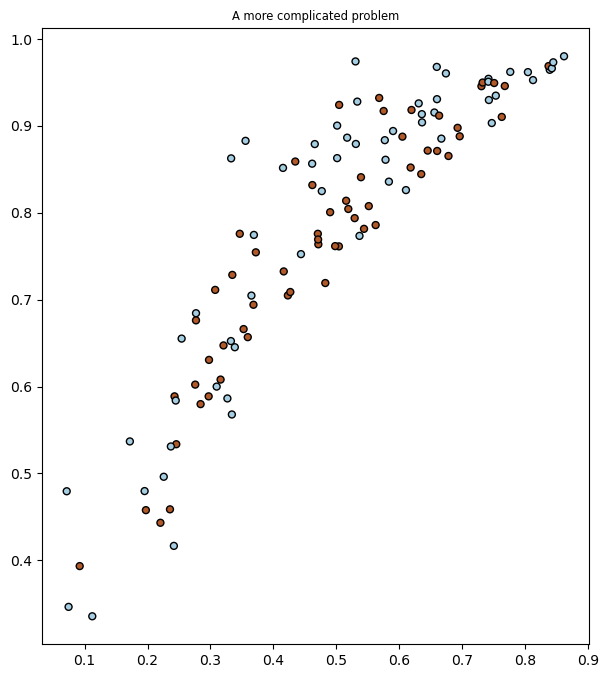

In [46]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(133)
ax.set_title("A more complicated problem", fontsize='small')
ax.scatter(data["PREDICT_original_sf_compactness_avg_2.5D"], data["PREDICT_original_sf_convexity_avg_2.5D"], marker='o', c=data.label, s=25, edgecolor='k', cmap=plt.cm.Paired)